In [1]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from State import State
from GenerateDemandMonthly import GenerateDemandMonthly
import pandas as pd

In [2]:
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':300,\
                   'mutation_probability':0.7,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':300}

df = pd.read_csv("./TOTALSA.csv")
mean = df['TOTALSA'].mean()
std = df['TOTALSA'].std()

state = State()
state.create_state([-1 ,0, 1, 1, 2, 2], mean=mean, std=std)
varbound=np.array([[round(mean * 2), round(mean * 10)]]*7)

def objective_no_season(X):
    start_inventory, s_DC1, S_DC1, s_DC2, S_DC2, s_r1, S_r2 = X
    return -1 * state.run(start_inventory, s_DC1, S_DC1, s_DC2, S_DC2, s_r1, S_r2) #7 parameters

model=ga(function=objective_no_season,\
        dimension=7,variable_type='int',\
        variable_boundaries=varbound, \
        algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [58. 49. 52. 45. 54. 42. 48.]

 Objective function:
 -108061.868


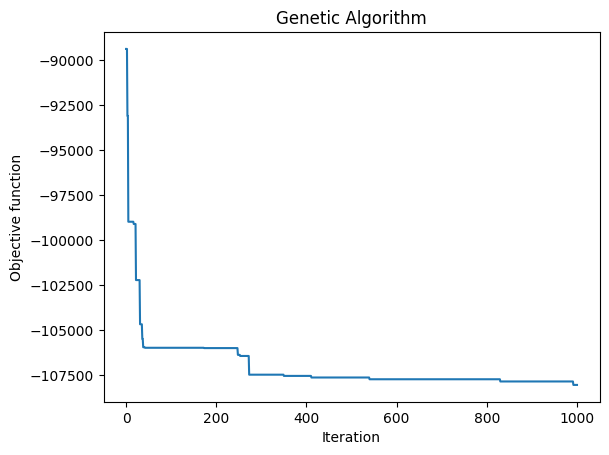

In [3]:
model.run() 

In [4]:
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':300,\
                   'mutation_probability':0.5,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':300}

df = pd.read_csv("./TOTALSA.csv")
mean = df['TOTALSA'].mean()
std = df['TOTALSA'].std()

state = State()
state.create_state([-1 ,0, 1, 1, 2, 2], mean=mean, std=std, cost=3)
varbound=np.array([[round(mean * 2), round(mean * 10)]]*7)

def objective_no_season(X):
    start_inventory, s_DC1, S_DC1, s_DC2, S_DC2, s_r1, S_r2 = X
    return -1 * state.run(start_inventory, s_DC1, S_DC1, s_DC2, S_DC2, s_r1, S_r2) #7 parameters

model2=ga(function=objective_no_season,\
        dimension=7,variable_type='int',\
        variable_boundaries=varbound, \
        algorithm_parameters=algorithm_param)

In [5]:
model2.run()

__________________________________________________ 0.6% GA is running...